In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package punkt to /home/u194151/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194151/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip data/News-_dataset.zip -d data/

In [3]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_data["label"] = 1
fake_data["label"] = 0

In [6]:
data = pd.concat([true_data, fake_data], axis=0)

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

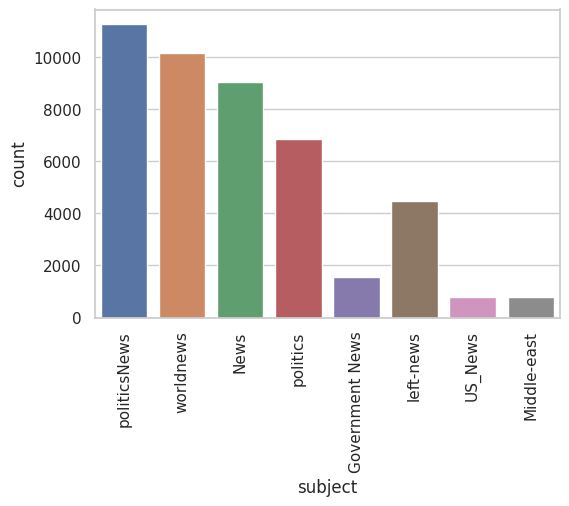

In [7]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [8]:
data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']

In [9]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [10]:
data.shape

(44898, 2)

In [11]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,HOW PEOPLE MAGAZINE COVER Proves Hillary Has A...,0
1,CONSERVATIVE Has Message For “DREAMERS” Scream...,0
2,Britain close to deal on Brexit bill with EU -...,1
3,WATCH: THINGS GOT REALLY AWKWARD When NBC Sent...,0
4,Fate of Obama legacy initiatives in hands of c...,1


<Axes: xlabel='label', ylabel='count'>

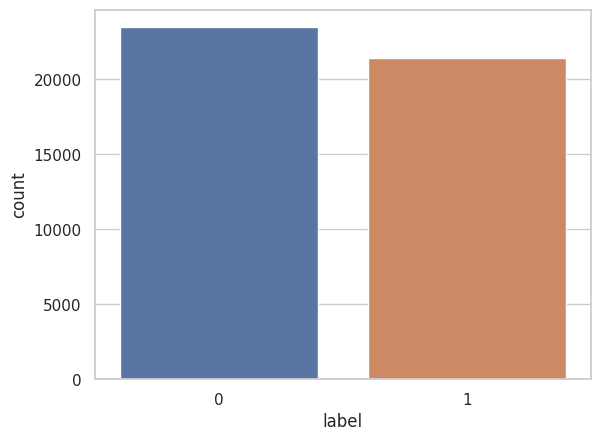

In [13]:
import seaborn as sns
sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

In [14]:
data2 = pd.read_csv('data/data2.csv')
data2.head()

,tweet,label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


In [15]:
def preprocess_text(text_data):
    preprocessed_text = []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return preprocessed_text

In [16]:
data2 = pd.read_csv('data/data2.csv')
data2.head()

,tweet,label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


In [17]:
preprocessed_review2 = preprocess_text(data2['tweet'].values)
data2['tweet'] = preprocessed_review2

  0%|          | 0/4015 [00:00<?, ?it/s]


NameError: name 'stopwords' is not defined

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [18]:
preprocessed_review2 = preprocess_text(data2['tweet'].values)
data2['tweet'] = preprocessed_review2

  0%|          | 0/4015 [00:00<?, ?it/s]


NameError: name 'stopwords' is not defined

In [19]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /home/u194151/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194151/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
preprocessed_review2 = preprocess_text(data2['tweet'].values)
data2['tweet'] = preprocessed_review2

 84%|████████▍ | 3364/4015 [00:15<00:03, 214.56it/s]


TypeError: expected string or bytes-like object

In [21]:
data2.isnull().sum()

tweet    2
label    0
dtype: int64

In [22]:
data2.dropna()

,tweet,label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real
...,...,...
4009,"""The virus originated in a laboratory in China""",fake
4010,"""The outbreak began because people ate bat soup""",fake
4011,"""5G helps SARS-CoV-2 spread""",fake
4012,"""Drinking alcohol reduces the risk of infection""",fake


In [23]:
data2.isnull().sum()

tweet    2
label    0
dtype: int64

In [24]:
data2=data2.dropna()

In [25]:
data2.isnull().sum()

tweet    0
label    0
dtype: int64

In [26]:
preprocessed_review2 = preprocess_text(data2['tweet'].values)
data2['tweet'] = preprocessed_review2

100%|██████████| 4013/4013 [00:20<00:00, 199.09it/s]


In [27]:
mapping = {'real': 1, 'fake': 2}

In [28]:
data2=data2.replace({'label': mapping})

In [29]:
data2.head()

,tweet,label
0,our daily update published states reported 734...,1
1,alfalfa cure covid19,2
2,president trump asked what he would do if he w...,2
3,states reported 630 deaths we still seeing sol...,1
4,this sixth time global health emergency declar...,1


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

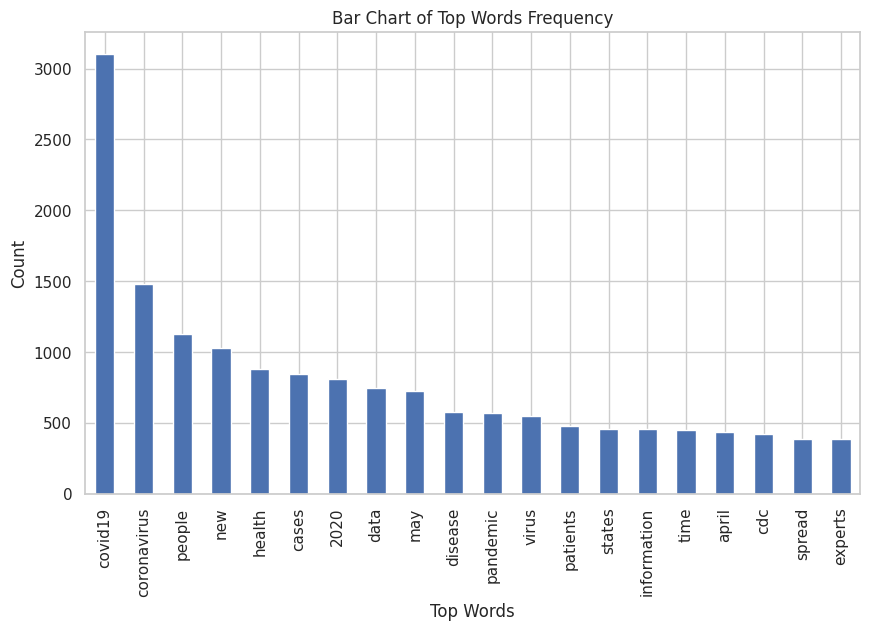

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
  
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(data2['tweet'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(data2['tweet'], 
                                                    data2['label'], 
                                                    test_size=0.25)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1681: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [61]:
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9627783316716517
0.8954183266932271


In [47]:
from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.8774900398406374


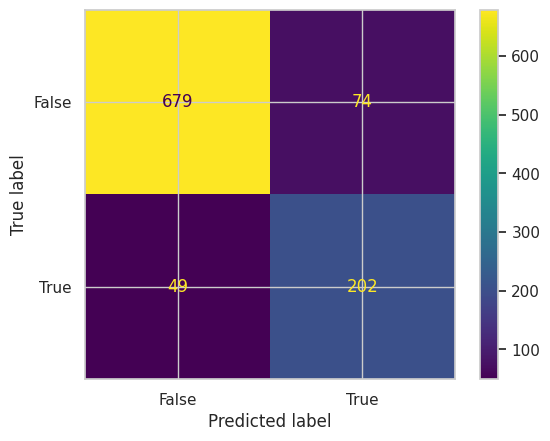

In [45]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report

In [64]:
# Preprocess the text data
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords])
    return text

In [65]:
X_train = x_train
X_test = x_test

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

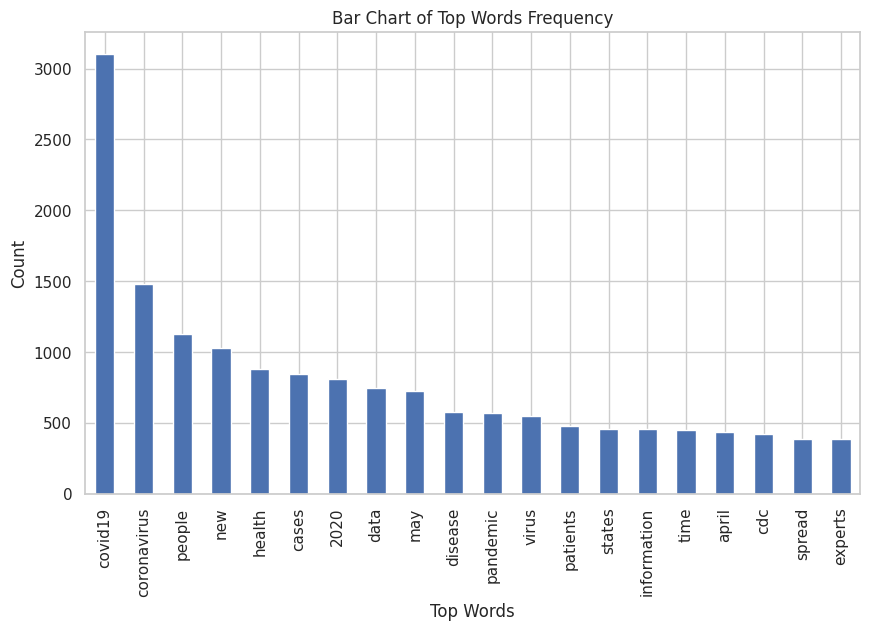

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
  
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(data2['tweet'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
X_train, X_test, Y_train, Y_test = train_test_split(data2['tweet'], 
                                                    data2['label'], 
                                                    test_size=0.2,random_state=45)

In [71]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report

In [72]:
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

In [73]:
def preprocess_text(text):
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords])
    return text

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1681: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [77]:
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train, Y_train)

PassiveAggressiveClassifier()

In [78]:
y_pred = classifier.predict(X_test)

In [79]:
accuracy = accuracy_score(Y_test, y_pred)
confusion_mtx = confusion_matrix(Y_test, y_pred)

# Print the full output
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mtx)

# Print the classification report
classification_rep = classification_report(Y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9327521793275217
Confusion Matrix:
[[563  22]
 [ 32 186]]
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.96      0.95       585
           2       0.89      0.85      0.87       218

    accuracy                           0.93       803
   macro avg       0.92      0.91      0.91       803
weighted avg       0.93      0.93      0.93       803

